In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import cv2 as cv
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'


In [2]:


(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


In [3]:


num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')


X_train = X_train / 255
X_test = X_test / 255


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]


model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/20


C:\Users\shivam\PycharmProjects\machine_learning_full_stack\Deep_learning\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 - 2s - 7ms/step - accuracy: 0.9220 - loss: 0.2766 - val_accuracy: 0.9603 - val_loss: 0.1346
Epoch 2/20
300/300 - 1s - 5ms/step - accuracy: 0.9688 - loss: 0.1099 - val_accuracy: 0.9721 - val_loss: 0.0951
Epoch 3/20
300/300 - 1s - 5ms/step - accuracy: 0.9793 - loss: 0.0714 - val_accuracy: 0.9750 - val_loss: 0.0793
Epoch 4/20
300/300 - 1s - 5ms/step - accuracy: 0.9854 - loss: 0.0501 - val_accuracy: 0.9779 - val_loss: 0.0702
Epoch 5/20
300/300 - 1s - 5ms/step - accuracy: 0.9898 - loss: 0.0364 - val_accuracy: 0.9780 - val_loss: 0.0674
Epoch 6/20
300/300 - 1s - 5ms/step - accuracy: 0.9927 - loss: 0.0260 - val_accuracy: 0.9794 - val_loss: 0.0672
Epoch 7/20
300/300 - 2s - 5ms/step - accuracy: 0.9950 - loss: 0.0196 - val_accuracy: 0.9811 - val_loss: 0.0589
Epoch 8/20
300/300 - 1s - 5ms/step - accuracy: 0.9969 - loss: 0.0137 - val_accuracy: 0.9825 - val_loss: 0.0597
Epoch 9/20
300/300 - 1s - 5ms/step - accuracy: 0.9976 - loss: 0.0108 - val_accuracy: 0.9816 - val_loss: 0.0594
Epoch 10/20


In [4]:

predictions = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step


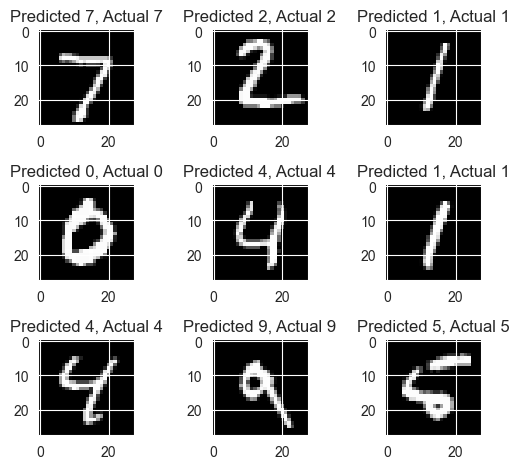

In [5]:
# lets see some predictions on the datasets 
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Actual {}".format(np.argmax(predictions[i]), np.argmax(y_test[i])))
    plt.tight_layout()
plt.show()


In [6]:
def upload_image(file):
    img = keras.preprocessing.image.load_img(file, target_size=(28, 28), color_mode='grayscale')
    img = keras.preprocessing.image.img_to_array(img)
    img = img.reshape(1, 784)
    img = img.astype('float32')
    img = img / 255.0
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


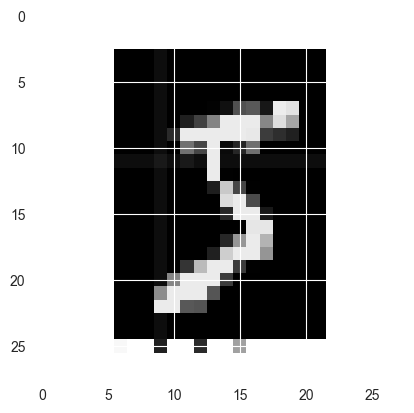

In [19]:
# lets make a prediction
img = upload_image('datasets/0.png')
prediction = model.predict(img)
predicted_image = img.reshape(28, 28)
plt.imshow(predicted_image, cmap='gray', interpolation='none')
plt.show()



In [7]:
 # thanks for watching